In [7]:
#importing libraries for data analysis and graphs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#import libraries for splitting data into training and testing
from sklearn.model_selection import train_test_split

In [9]:
#importing libraries for evaluation of the MODEL
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [10]:
#storing the data into a pandas dataframe
original_data = pd.read_csv('credit_card_test.csv')

In [11]:
#glimpse of data
original_data

,avg_amount_days,transaction_amount,daily_chbk_avg_amt,avg_chbk_amt,chbk_freq,is_fradulent
0,100.0,3000.0,0,0.0,0,1
1,100.0,4300.0,0,0.0,0,1
2,185.5,4823.0,0,0.0,0,1
3,185.5,5008.5,0,0.0,0,1
4,500.0,26000.0,800,677.2,6,1
...,...,...,...,...,...,...
3070,500.0,11000.0,754,585.0,7,0
3071,800.0,0.0,754,585.0,7,0
3072,800.0,20800.0,754,585.0,7,0
3073,1500.0,12000.0,754,585.0,7,0


ANALYSIS OF DATA

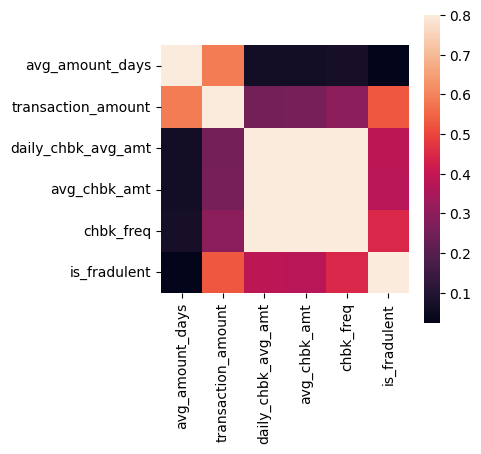

In [12]:
# Correlation matrix
corrmat = original_data.corr()
fig = plt.figure(figsize = (4, 4))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [13]:
#information about the dataset
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_amount_days     3075 non-null   float64
 1   transaction_amount  3075 non-null   float64
 2   daily_chbk_avg_amt  3075 non-null   int64  
 3   avg_chbk_amt        3075 non-null   float64
 4   chbk_freq           3075 non-null   int64  
 5   is_fradulent        3075 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 144.3 KB


In [14]:
#checking for missing values
original_data.isnull().sum()

avg_amount_days       0
transaction_amount    0
daily_chbk_avg_amt    0
avg_chbk_amt          0
chbk_freq             0
is_fradulent          0
dtype: int64

In [15]:
#splitting the data into Normal and Fraud Transactions for better Understanding
normal = original_data[original_data.is_fradulent == 0]
fraud = original_data[original_data.is_fradulent == 1]

In [16]:
#Description of normal transactions
normal.transaction_amount.describe()

count     2627.000000
mean      7662.995957
std       6869.468187
min          0.000000
25%       1997.915000
50%       5589.460000
75%      11752.525000
max      36000.000000
Name: transaction_amount, dtype: float64

In [17]:
#Description of fraud transactions
fraud.transaction_amount.describe()

count       448.000000
mean      22855.440603
std       15217.912436
min         257.900000
25%       11582.060000
50%       20944.745000
75%       32409.355000
max      108000.000000
Name: transaction_amount, dtype: float64

In [18]:
#comparing the values of both transactions
original_data.groupby("is_fradulent").mean()

,avg_amount_days,transaction_amount,daily_chbk_avg_amt,avg_chbk_amt,chbk_freq
is_fradulent,,,,,
0,512.193677,7662.995957,22.807766,15.824134,0.108108
1,531.637946,22855.440603,248.832589,181.917187,2.055804


SPLITTING THE DATA INTO FEATURES AND TARGET

In [19]:
X = original_data.drop(columns="is_fradulent",axis=1)
Y =original_data['is_fradulent']

SPLITTING THE DATA INTO TRAINING AND TESTING

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

MODEL TRAINING

LOGISTIC REGRESSION

In [21]:
#importing libraries for model
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
# training the Logistic Regression Model with Training Data
lgr.fit(x_train, y_train)

c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Random Forest Classifier

In [22]:
#importing libraries for model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
# training the Logistic Regression Model with Training Data
rfc.fit(x_train, y_train)

RandomForestClassifier()

Decision Tree Classifier

In [23]:
#importing libraries for model
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
# training the Logistic Regression Model with Training Data
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

EVALUATION OF THE TRAINED MODELS

LOGISTIC REGRESSION

The accuracy is 0.9723577235772358
The precision is 0.8333333333333334
The recall is 0.974025974025974
The F1-Score is 0.8982035928143713


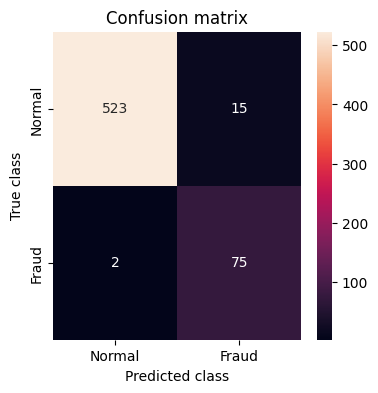

In [24]:
X_test_prediction = lgr.predict(x_test)
acc = accuracy_score(X_test_prediction, y_test)
print("The accuracy is {}".format(acc))
  
prec = precision_score(X_test_prediction, y_test)
print("The precision is {}".format(prec))
  
rec = recall_score(X_test_prediction, y_test)
print("The recall is {}".format(rec))
  
f1 = f1_score(X_test_prediction, y_test)
print("The F1-Score is {}".format(f1))
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(X_test_prediction, y_test)
plt.figure(figsize =(4, 4))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Random Forest Classifier

The accuracy is 0.967479674796748
The precision is 0.8222222222222222
The recall is 0.9487179487179487
The F1-Score is 0.8809523809523809


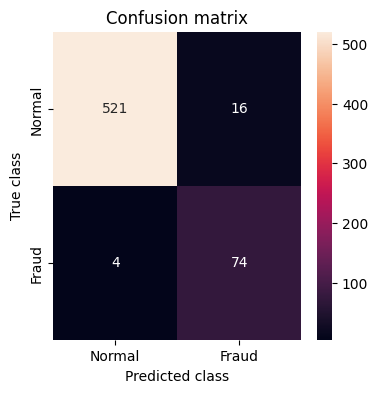

In [25]:
X_test_prediction = rfc.predict(x_test)
acc = accuracy_score(X_test_prediction, y_test)
print("The accuracy is {}".format(acc))
  
prec = precision_score(X_test_prediction, y_test)
print("The precision is {}".format(prec))
  
rec = recall_score(X_test_prediction, y_test)
print("The recall is {}".format(rec))
  
f1 = f1_score(X_test_prediction, y_test)
print("The F1-Score is {}".format(f1))
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(X_test_prediction, y_test)
plt.figure(figsize =(4, 4))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Decision Tree Classifier

The accuracy is 0.9512195121951219
The precision is 0.8333333333333334
The recall is 0.8333333333333334
The F1-Score is 0.8333333333333334


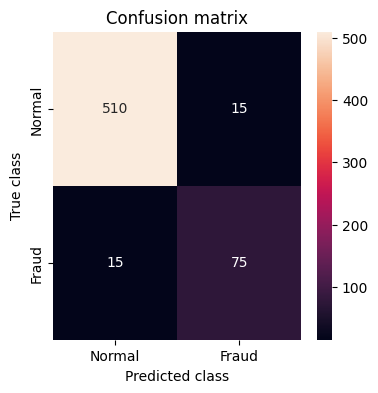

In [26]:
X_test_prediction = dtc.predict(x_test)
acc = accuracy_score(X_test_prediction, y_test)
print("The accuracy is {}".format(acc))
  
prec = precision_score(X_test_prediction, y_test)
print("The precision is {}".format(prec))
  
rec = recall_score(X_test_prediction, y_test)
print("The recall is {}".format(rec))
  
f1 = f1_score(X_test_prediction, y_test)
print("The F1-Score is {}".format(f1))
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(X_test_prediction, y_test)
plt.figure(figsize =(4, 4))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

SAVING THE MODELS

In [27]:
import pickle
file=open("lgr.pkl", 'wb')
pickle.dump(lgr, file)

In [28]:
import pickle
file=open("rfc.pkl", 'wb')
pickle.dump(lgr, file)

In [29]:
import pickle
file=open("dtc.pkl", 'wb')
pickle.dump(lgr, file)